## Основы предобработки данных

In [2]:
pip install numpy

     |████████████████████████████████| 16.1 MB 6.2 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pandas

In [11]:
pip install sklearn

     |████████████████████████████████| 7.3 MB 9.7 MB/s eta 0:00:01
     |████████████████████████████████| 302 kB 14.2 MB/s eta 0:00:01
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=2c76bcb008fe8b70e3de5ba17894216dc358ae7ec23feb5eb71bd293b9895887
  Stored in directory: /Users/darya.sukhova/Library/Caches/pip/wheels/e4/7b/98/b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install matplotlib

     |████████████████████████████████| 8.5 MB 5.4 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 16.7 MB/s eta 0:00:01
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
     |████████████████████████████████| 61 kB 1.2 MB/s  eta 0:00:01
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install seaborn

     |████████████████████████████████| 285 kB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 30.9 MB 32.4 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

### Загрузка данных и предварительный анализа

Dibetes dataset https://www.kaggle.com/uciml/pima-indians-diabetes-database 

In [13]:
diabetes_df = pd.read_csv('diabetes.csv', index_col=None)
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:
diabetes_df.shape

(768, 9)

In [15]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Изучение и обработка количественных признаков

In [17]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In [18]:
diabetes_df.var()

Pregnancies                    11.354
Glucose                      1022.248
BloodPressure                 374.647
SkinThickness                 254.473
Insulin                     13281.180
BMI                            62.160
DiabetesPedigreeFunction        0.110
Age                           138.303
Outcome                         0.227
dtype: float64

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Glucose'}>]], dtype=object)

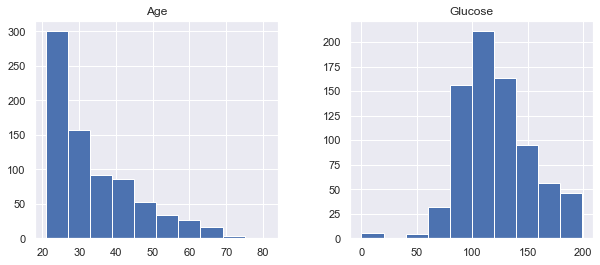

In [19]:
diabetes_df[['Age','Glucose']].hist(figsize=(10, 4))

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

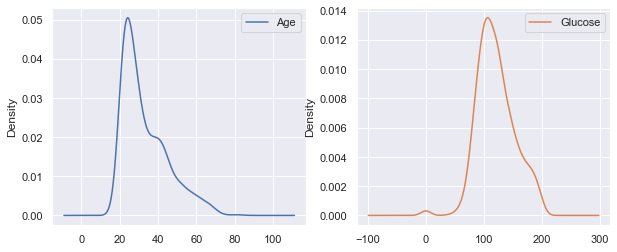

In [20]:
diabetes_df[['Age','Glucose']].plot(kind='density', layout=(1, 2), subplots=True,
                                   figsize=(10, 4), sharex=False)

/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

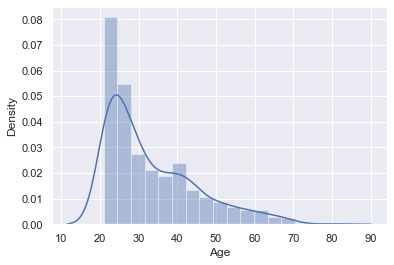

In [21]:
sns.distplot(diabetes_df['Age'])

#### Обработка выбросов

<AxesSubplot:xlabel='Insulin'>

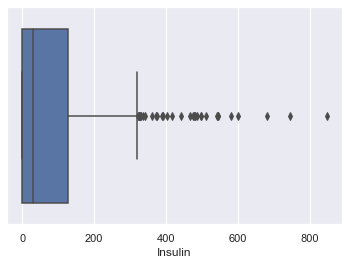

In [22]:
sns.boxplot(x='Insulin', data=diabetes_df)

<AxesSubplot:>

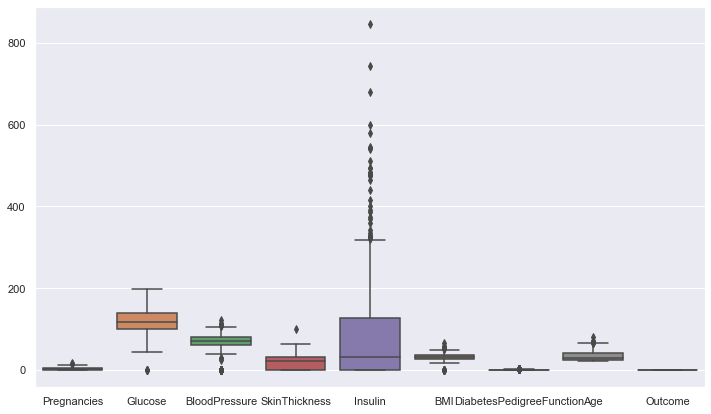

In [23]:
fig, axs = plt.subplots(figsize=(12,7))
sns.boxplot(data=diabetes_df)

In [24]:
diabetes_df['Insulin'] = diabetes_df.Insulin.clip(lower=diabetes_df.Insulin.quantile(0.05), 
                                                  upper=diabetes_df.Insulin.quantile(0.95))

<AxesSubplot:>

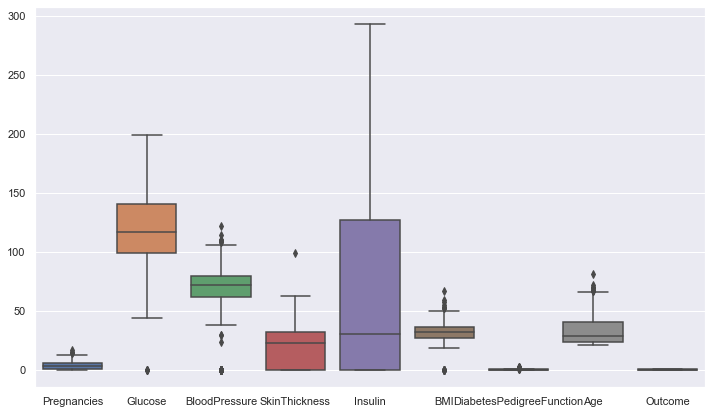

In [25]:
plt.subplots(figsize=(12,7))
sns.boxplot(data=diabetes_df)

### Обработка пропущенных значений

#### Поиск пропусков

In [26]:
no_zero_columns = list (set(diabetes_df.columns) -  set(['Outcome','Pregnancies']))

In [27]:
(diabetes_df[no_zero_columns] == 0).sum()

Insulin                     374
BloodPressure                35
BMI                          11
Glucose                       5
SkinThickness               227
Age                           0
DiabetesPedigreeFunction      0
dtype: int64

In [28]:
diabetes_df.loc[:, no_zero_columns] = diabetes_df[no_zero_columns].replace(0, np.NaN)
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [29]:
diabetes_df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

#### Работа с пропусками

In [30]:
# "Плохие" способы:

    # Удаляем строки
print (diabetes_df.dropna(how='any', axis=0).shape)

    # Удаляем столбцы
print (diabetes_df.dropna(how='any', axis=1).shape)

(392, 9)
(768, 4)


In [31]:
# Заполняем произвольным значением

diabetes_df.fillna(-1).head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,-1.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,-1.0,26.6,0.351,31,0
2,8,183.0,64.0,-1.0,-1.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [32]:
diabetes_df.isnull().mean()

Pregnancies                 0.000
Glucose                     0.007
BloodPressure               0.046
SkinThickness               0.296
Insulin                     0.487
BMI                         0.014
DiabetesPedigreeFunction    0.000
Age                         0.000
Outcome                     0.000
dtype: float64

In [33]:
# Удалить столбцы, в которых много пропущенных значение
diabetes_df.loc[:, diabetes_df.isnull().mean() < .25].shape

(768, 7)

In [34]:
diabetes_df.fillna(diabetes_df.mean(), inplace=True)

# diabetes_df['Glucose'].fillna((diabetes['Glucose']).mode()[0], inplace=True)
# diabetes_df['BMI'].fillna((diabetes['BMI']).mean(), inplace=True)
# diabetes_df['Insulin'].fillna((diabetes['Insulin']).median(), inplace=True)

diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Дискретизация данных (binning)

In [35]:
# Equal-width partitioning

diabetes_df['Age_equal'] = pd.cut(diabetes_df['Age'], 5)
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_equal
0,6,148.0,72.0,35.000,141.246,33.6,0.627,50,1,"(45.0, 57.0]"
1,1,85.0,66.0,29.000,141.246,26.6,0.351,31,0,"(20.94, 33.0]"
2,8,183.0,64.0,29.153,141.246,23.3,0.672,32,1,"(20.94, 33.0]"
3,1,89.0,66.0,23.000,94.000,28.1,0.167,21,0,"(20.94, 33.0]"
4,0,137.0,40.0,35.000,168.000,43.1,2.288,33,1,"(20.94, 33.0]"


In [36]:
#Expert partitioning

bins = [0,12,19,35,60,100]
group_names = ['Child', 'Teenager', 'Young', 'Adult','Elderly']
diabetes_df['Age_expert'] = pd.cut(diabetes_df['Age'], bins, labels=group_names)
diabetes_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_equal,Age_expert
0,6,148.0,72.0,35.000,141.246,33.6,0.627,50,1,"(45.0, 57.0]",Adult
1,1,85.0,66.0,29.000,141.246,26.6,0.351,31,0,"(20.94, 33.0]",Young
2,8,183.0,64.0,29.153,141.246,23.3,0.672,32,1,"(20.94, 33.0]",Young
3,1,89.0,66.0,23.000,94.000,28.1,0.167,21,0,"(20.94, 33.0]",Young
4,0,137.0,40.0,35.000,168.000,43.1,2.288,33,1,"(20.94, 33.0]",Young


### Изучение категориальных и бинарных признаков

In [37]:
diabetes_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [38]:
diabetes_df['Age_equal'].value_counts()

(20.94, 33.0]    474
(33.0, 45.0]     176
(45.0, 57.0]      76
(57.0, 69.0]      39
(69.0, 81.0]       3
Name: Age_equal, dtype: int64

In [39]:
diabetes_df['Age_expert'].value_counts()

Young       498
Adult       243
Elderly      27
Child         0
Teenager      0
Name: Age_expert, dtype: int64

<AxesSubplot:>

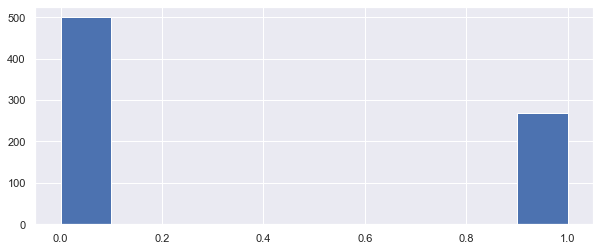

In [40]:
diabetes_df['Outcome'].hist(figsize=(10, 4))

<AxesSubplot:>

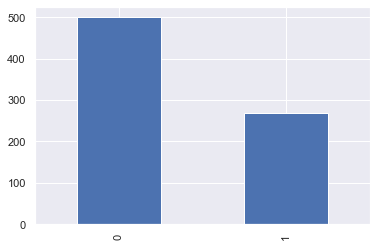

In [41]:
diabetes_df['Outcome'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Outcome', ylabel='count'>

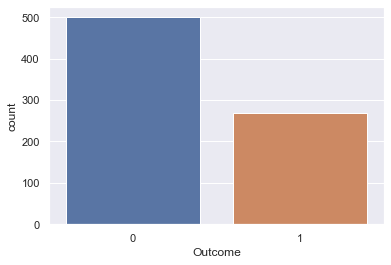

In [42]:
sns.countplot(x='Outcome', data=diabetes_df)

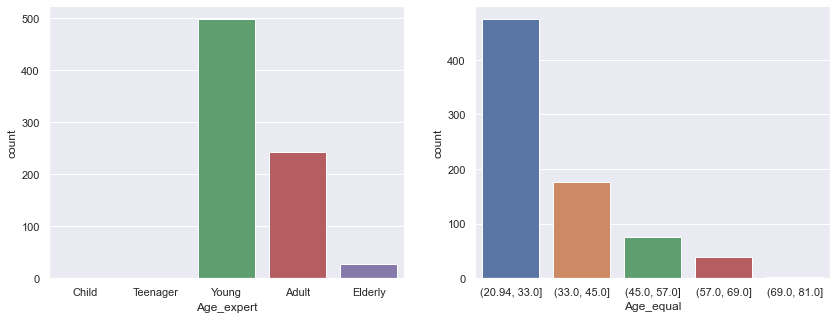

In [43]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

sns.countplot(x='Age_expert', data=diabetes_df, ax=axes[0]);
sns.countplot(x='Age_equal', data=diabetes_df, ax=axes[1]);

### Изчение взаимодействия признаков

#### Только количественные признаки

Text(0, 0.5, 'Insulin')

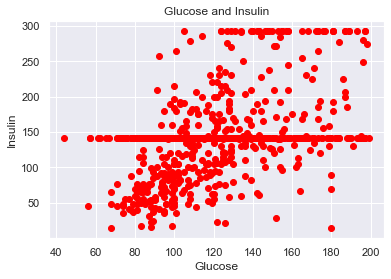

In [44]:
plt.scatter(diabetes_df['Glucose'], diabetes_df['Insulin'], color='red')
plt.title('Glucose and Insulin')
plt.xlabel('Glucose')
plt.ylabel('Insulin')

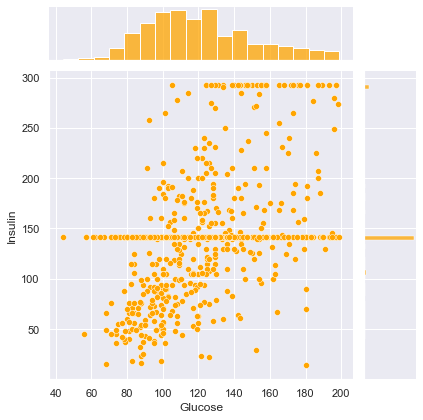

In [45]:
sns.jointplot(x='Glucose', y='Insulin', data=diabetes_df, kind='scatter', color='orange')


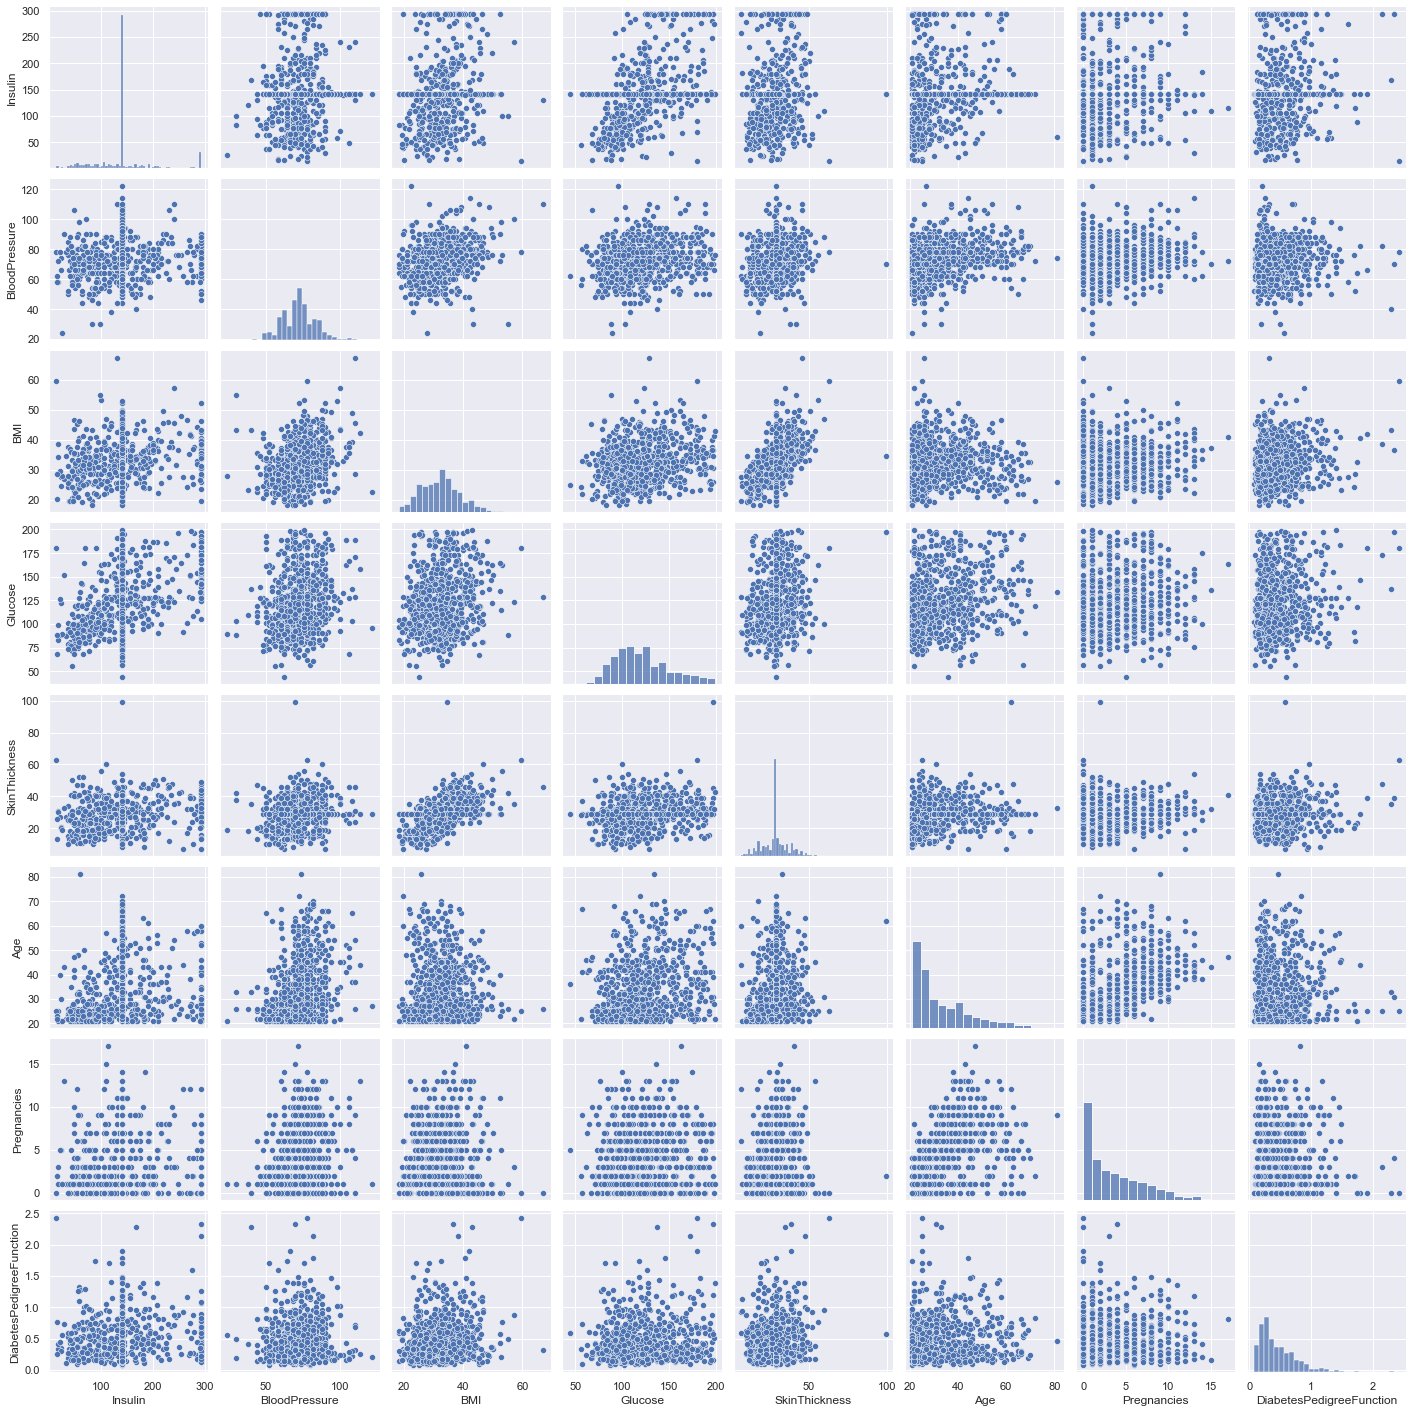

In [46]:
num_columns = list(set(diabetes_df.columns) -  set(['Outcome','Age_expert','Age_equal']))
sns.pairplot(diabetes_df[num_columns])

In [47]:
corr_matrix = diabetes_df[num_columns].corr()
corr_matrix

,Insulin,BloodPressure,BMI,Glucose,SkinThickness,Age,Pregnancies,DiabetesPedigreeFunction
Insulin,1.000,0.098,0.193,0.448,0.173,0.152,0.086,0.093
BloodPressure,0.098,1.000,0.281,0.218,0.193,0.325,0.209,-0.003
BMI,0.193,0.281,1.000,0.231,0.542,0.026,0.022,0.153
Glucose,0.448,0.218,0.231,1.000,0.193,0.267,0.128,0.137
SkinThickness,0.173,0.193,0.542,0.193,1.000,0.128,0.083,0.101
Age,0.152,0.325,0.026,0.267,0.128,1.000,0.544,0.034
Pregnancies,0.086,0.209,0.022,0.128,0.083,0.544,1.000,-0.034
DiabetesPedigreeFunction,0.093,-0.003,0.153,0.137,0.101,0.034,-0.034,1.000


<AxesSubplot:>

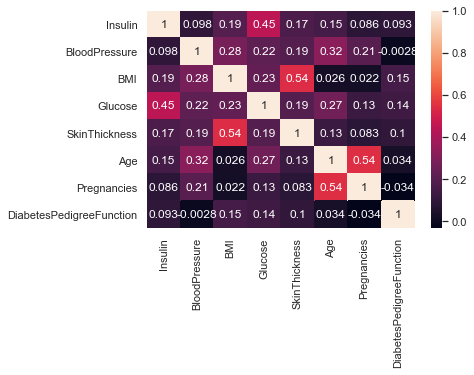

In [48]:
sns.heatmap(corr_matrix, annot=True, annot_kws={"size":12})

#### Количественные и качественные признаки

In [49]:
diabetes_df.pivot_table(['Glucose', 'Insulin'],['Outcome'], aggfunc='mean')

,Glucose,Insulin
Outcome,,
0,110.710,130.994
1,142.166,160.373


<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

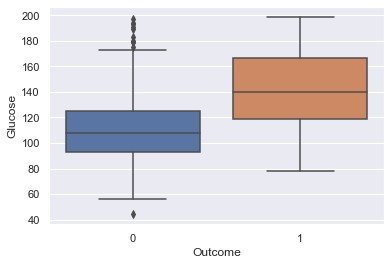

In [50]:
sns.boxplot(x='Outcome', y='Glucose', data=diabetes_df)

/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


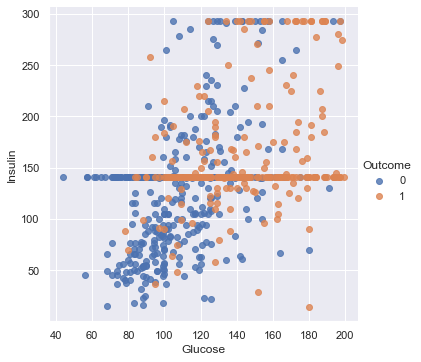

In [51]:
sns.lmplot('Glucose', 'Insulin', data=diabetes_df, hue='Outcome', fit_reg=False);

#### Только качественные признаки

In [52]:
pd.crosstab(diabetes_df['Age_equal'], diabetes_df['Outcome'], margins=True)

Outcome,0,1,All
Age_equal,,,
"(20.94, 33.0]",352,122,474
"(33.0, 45.0]",88,88,176
"(45.0, 57.0]",32,44,76
"(57.0, 69.0]",26,13,39
"(69.0, 81.0]",2,1,3
All,500,268,768


<AxesSubplot:xlabel='Age_equal', ylabel='count'>

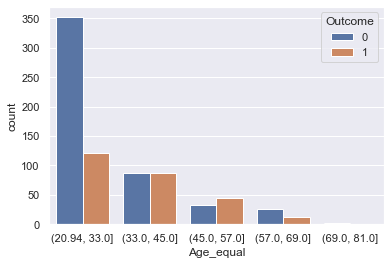

In [53]:
sns.countplot(x='Age_equal', hue='Outcome', data=diabetes_df)

### Нормализация данных

<AxesSubplot:ylabel='Density'>

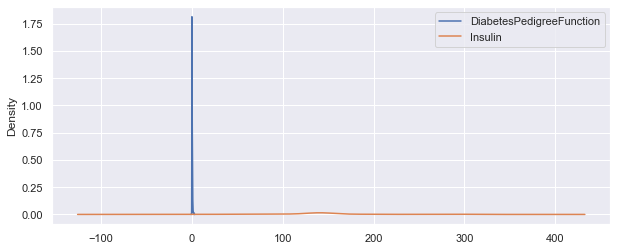

In [54]:
diabetes_df[['DiabetesPedigreeFunction','Insulin']].plot(kind='density', layout=(1, 2), sharex=False, figsize=(10, 4))

<AxesSubplot:>

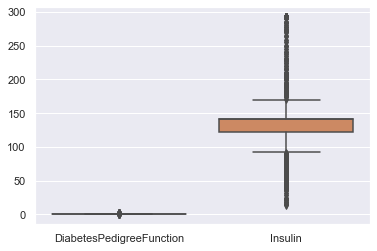

In [55]:
sns.boxplot(data=diabetes_df[['DiabetesPedigreeFunction', 'Insulin']])

In [56]:
std_scaler = StandardScaler().fit(diabetes_df[['DiabetesPedigreeFunction','Insulin']])

cols_std_scaled = std_scaler.transform(diabetes_df[['DiabetesPedigreeFunction','Insulin']])

minmax_scaler = MinMaxScaler().fit(diabetes_df[['DiabetesPedigreeFunction','Insulin']])

cols_minmax_scaled = minmax_scaler.transform(diabetes_df[['DiabetesPedigreeFunction','Insulin']])

type(cols_std_scaled)

numpy.ndarray

In [57]:
print('Mean after standardization:\nDiabetesPedigreeFunction={:.2f}, Insulin={:.2f}'
      .format(cols_std_scaled[:,0].mean(), cols_std_scaled[:,1].mean()))
print('\nStandard deviation after standardization:\nGlucose={:.2f}, Insulin={:.2f}\n'
      .format(cols_std_scaled[:,0].std(), cols_std_scaled[:,1].std()))

print('Mean after min-max scaling:\nDiabetesPedigreeFunction={:.2f}, Insulin={:.2f}'
      .format(cols_minmax_scaled[:,0].mean(), cols_minmax_scaled[:,1].mean()))
print('\nStandard deviation after min-max scaling:\nDiabetesPedigreeFunction={:.2f}, Insulin={:.2f}'
      .format(cols_minmax_scaled[:,0].std(), cols_minmax_scaled[:,1].std()))

Mean after standardization:
DiabetesPedigreeFunction=0.00, Insulin=-0.00

Standard deviation after standardization:
Glucose=1.00, Insulin=1.00

Mean after min-max scaling:
DiabetesPedigreeFunction=0.17, Insulin=0.46

Standard deviation after min-max scaling:
DiabetesPedigreeFunction=0.14, Insulin=0.20


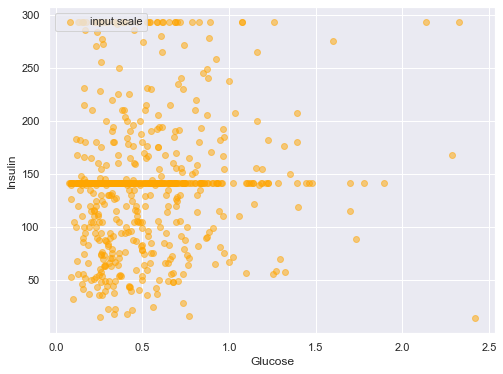

In [58]:
plt.figure(figsize=(8,6))
plt.scatter(diabetes_df['DiabetesPedigreeFunction'], diabetes_df['Insulin'], color='orange', label='input scale', alpha=0.5)  
#plt.scatter(cols_std_scaled[:,0], cols_std_scaled[:,1], color='red', label='Standardized [N  (m=0, ; d=1)]', alpha=0.3)
#plt.scatter(cols_minmax_scaled[:,0], cols_minmax_scaled[:,1],color='blue', label='Min-max scaling [min=0, max=1]', alpha=0.3)
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.legend(loc='upper left')


<AxesSubplot:ylabel='Density'>

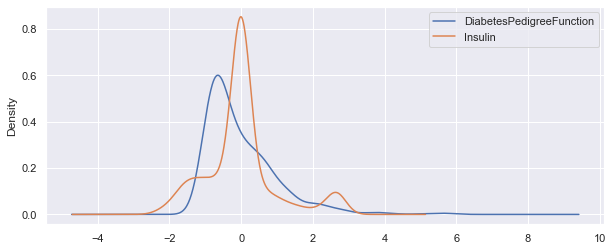

In [59]:
diabetes_df_scaled = pd.DataFrame(cols_std_scaled, columns = ['DiabetesPedigreeFunction', 'Insulin'])

diabetes_df_scaled[['DiabetesPedigreeFunction','Insulin']].plot(kind='density', layout=(1, 2), sharex=False, figsize=(10, 4))

<AxesSubplot:>

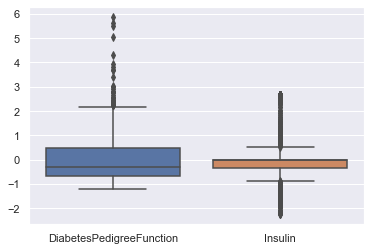

In [60]:
sns.boxplot(data=diabetes_df_scaled[['DiabetesPedigreeFunction', 'Insulin']])